**DATASET IMPORT**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
from google.colab import files
upload = files.upload()


Saving Admission_Predict.csv to Admission_Predict.csv


In [4]:
data = pd.read_csv('Admission_Predict.csv')

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**DATA** **ANALYSIS**

In [5]:
data.drop(["Serial No."], axis=1, inplace=True)
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Dealing with null values

In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Univariate Analysis 

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

Series([], dtype: object)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

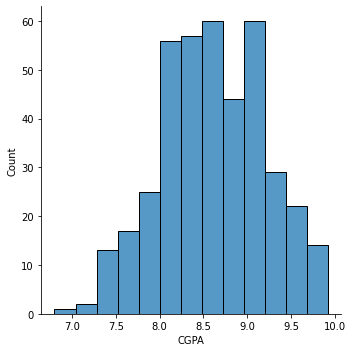

In [52]:
sns.displot(data, x="CGPA")
plt.savefig("cgpa.png")
files.download("cgpa.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

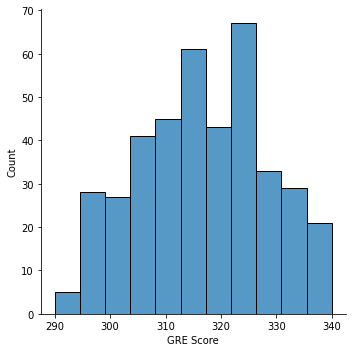

In [46]:
sns.displot(data, x="GRE Score")
plt.savefig("gre.png")
files.download("gre.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

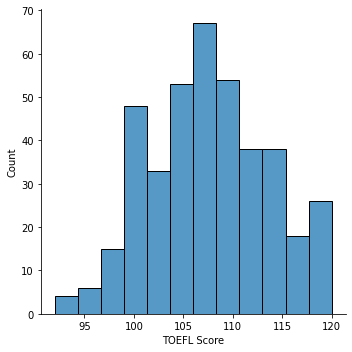

In [48]:
sns.displot(data, x="TOEFL Score")
plt.savefig("toefl.png")
files.download("toefl.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

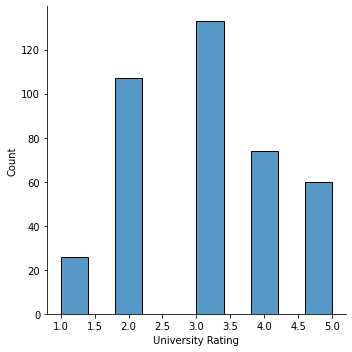

In [49]:
sns.displot(data, x="University Rating")
plt.savefig("uni.png")
files.download("uni.png") 

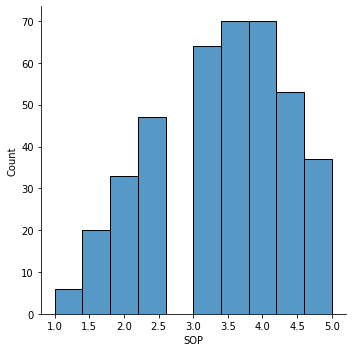

In [19]:
sns.displot(data, x="SOP")

From observing the distribution, we can now try to understand the relation between two columns

Bivariate (Alongside univariate)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

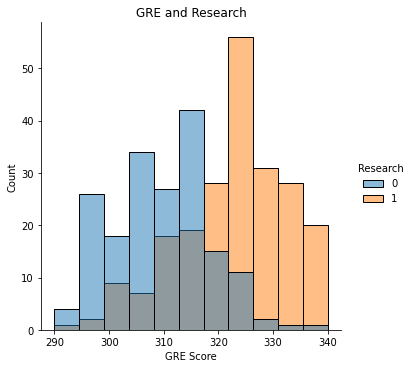

In [50]:
sns.displot(data, x="GRE Score", hue="Research")
plt.title('GRE and Research')
plt.savefig("g and r.png")
files.download("g and r.png") 

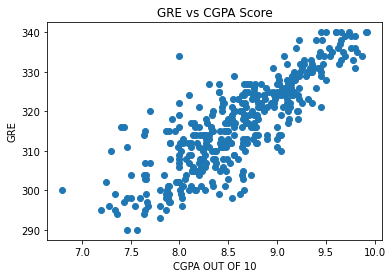

In [24]:
plt.scatter(data['CGPA'],data['GRE Score'])
plt.title('GRE vs CGPA Score')
plt.xlabel('CGPA OUT OF 10')
plt.ylabel('GRE')
plt.show()

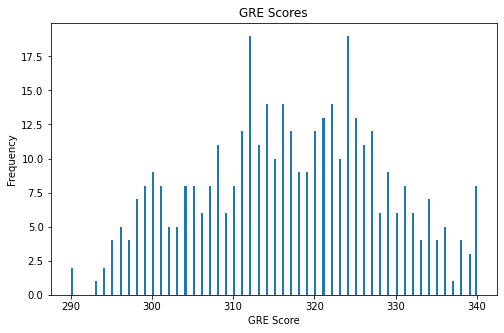

In [25]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (8,5))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

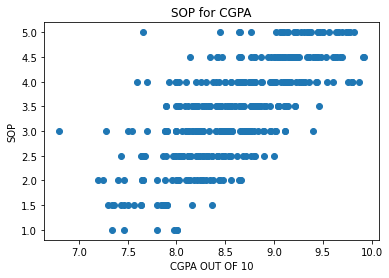

In [26]:
plt.scatter(data['CGPA'],data['SOP'])
plt.title('SOP for CGPA')
plt.xlabel('CGPA OUT OF 10')
plt.ylabel('SOP')
plt.show()

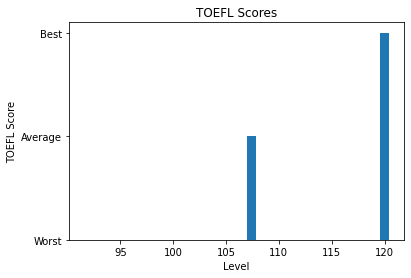

In [27]:
p_data = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
r_data = ["Worst","Average","Best"]
plt.bar(p_data,r_data)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

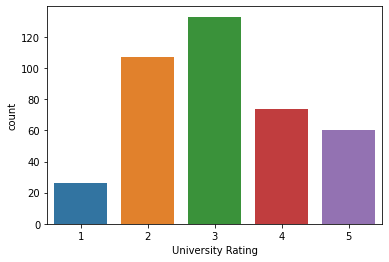

In [33]:
data.Research.value_counts()
sns.countplot(x="University Rating",data=data)

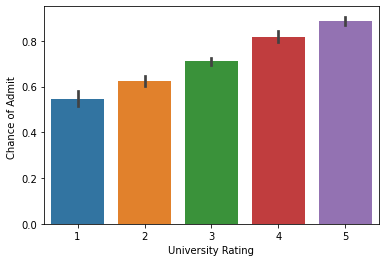

In [32]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data)

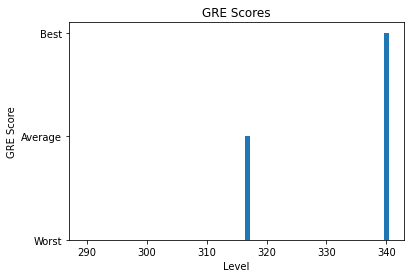

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [51]:
g_data = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h_data = ["Worst","Average","Best"]
plt.bar(g_data,h_data)
plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")
plt.show()
plt.savefig("avg gre.png")
files.download("avg gre.png") 

In [29]:
corr_matrix=data.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


Multivariate Analysis

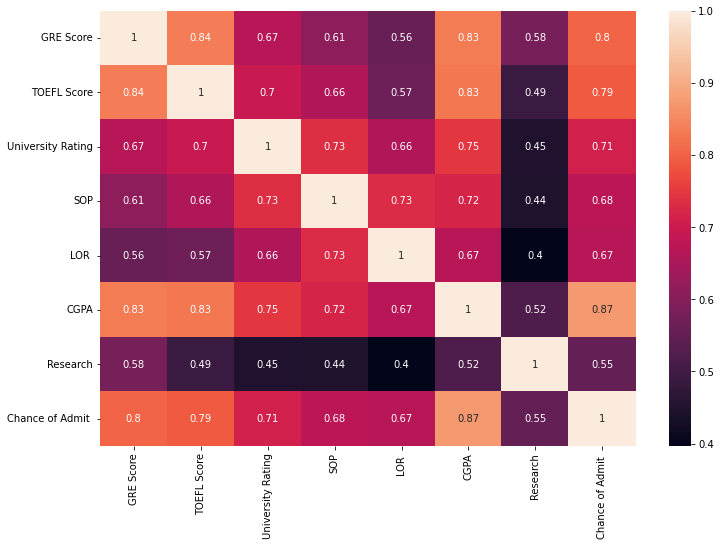

In [30]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

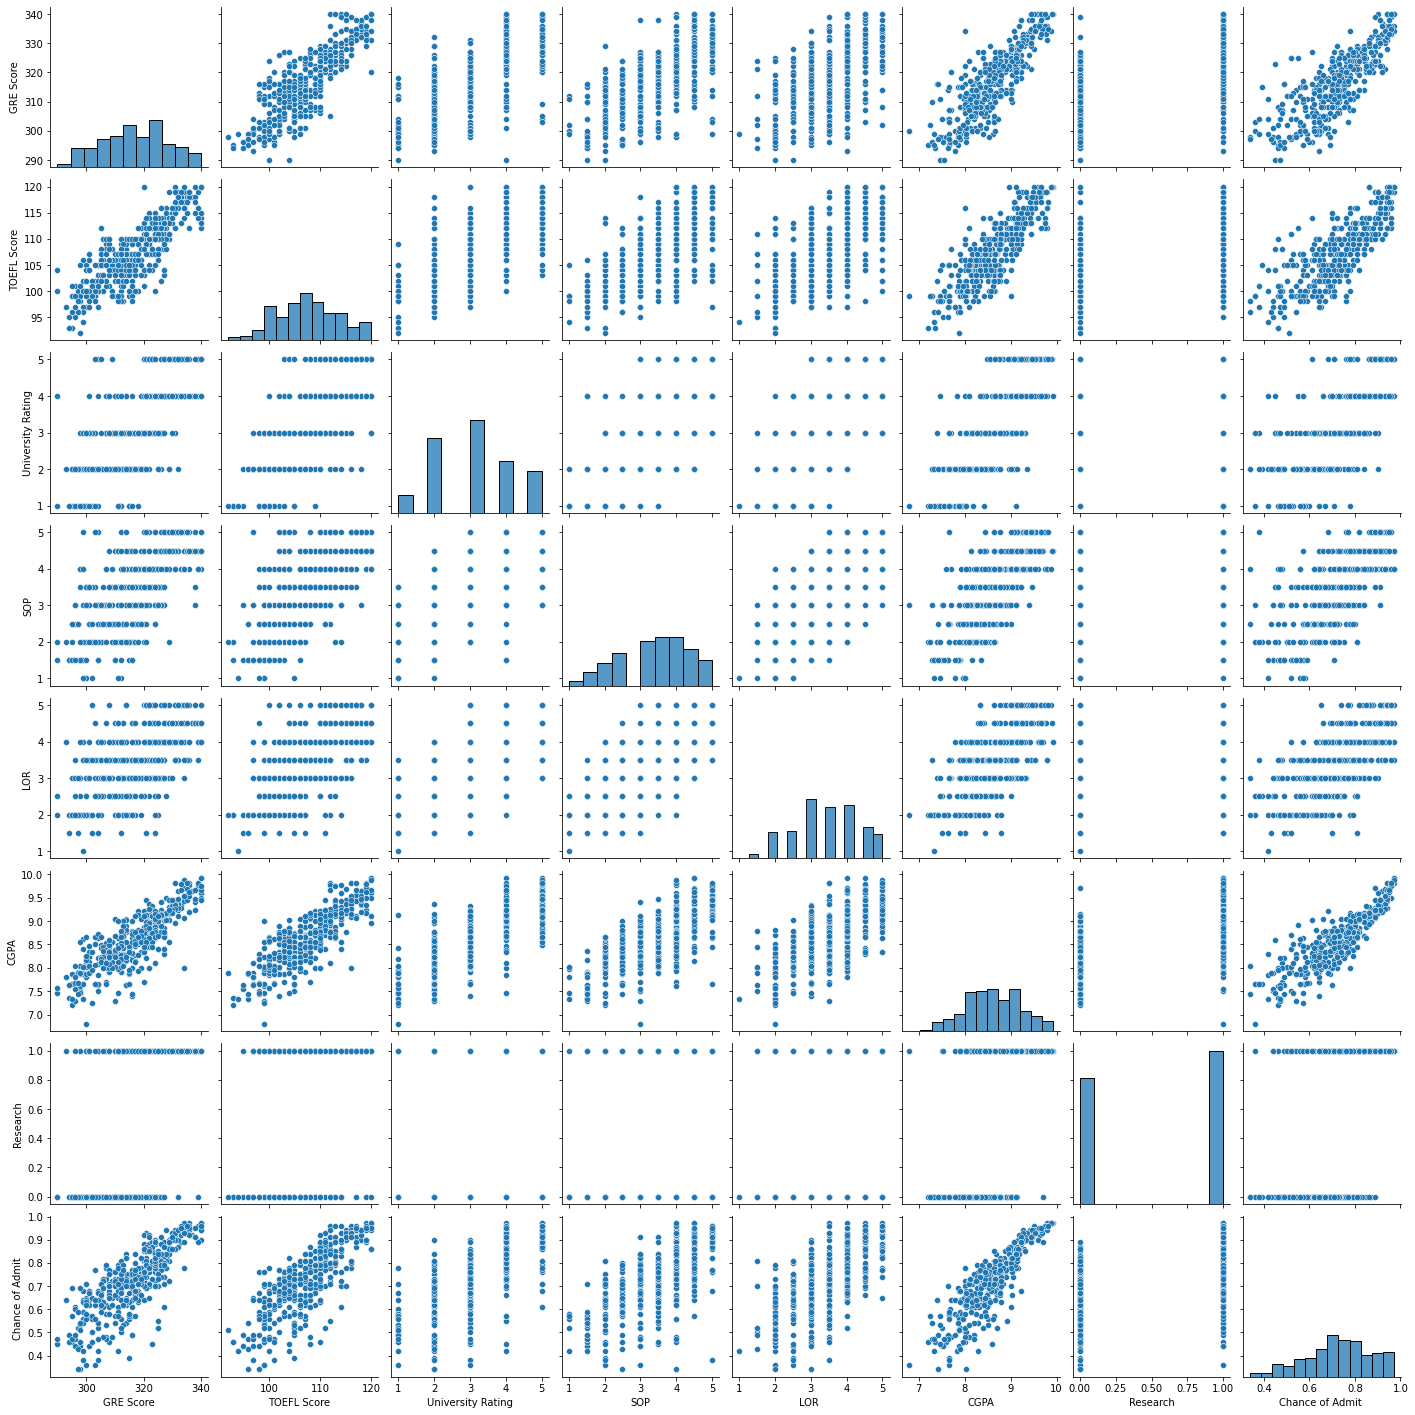

In [34]:
sns.pairplot(data)

**SPLITTING DATA INTO DEPENDENT AND INDEPENDENT**

In [35]:
X = data.iloc[:,0:7]
y = data['Chance of Admit ']
y.head().to_frame()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [36]:
print(f'x contains: {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y contains: {y.shape}')

x contains: 400 rows and 7 columns
y contains: (400,)


SCALING INDEPENDENT VARIABLES

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [40]:
x = data[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA", "Research"]]
y = data["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
MULTIPLE LINEAR REGRESSION

In [41]:
multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.821


DECISION TREE REGRESSION

In [42]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.630


In [43]:
ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest Regression's Score = 0.807
